In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import pandas_datareader.data as web
import datetime as dt
import statistics

In [235]:
inicio=dt.datetime(2019,6,16)
fim=dt.datetime(2019,11,29)
df=web.DataReader('itub4.SA', 'yahoo', inicio, fim)

In [236]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,34.320000,33.810001,33.900002,33.950001,15638100.0,31.958014
2019-06-18,34.830002,34.180000,34.349998,34.830002,22791000.0,32.786377
2019-06-19,35.490002,34.470001,34.639999,35.380001,23278900.0,33.304108
2019-06-21,36.180000,35.500000,35.580002,36.180000,27455000.0,34.057167
2019-06-24,36.500000,35.790001,36.240002,36.099998,22715800.0,33.981853
...,...,...,...,...,...,...
2019-11-25,35.900002,35.009998,35.790001,35.220001,15202500.0,33.752247
2019-11-26,35.090000,34.349998,35.000000,34.500000,26176400.0,33.062241
2019-11-27,34.930000,34.259998,34.700001,34.700001,19366600.0,33.253914


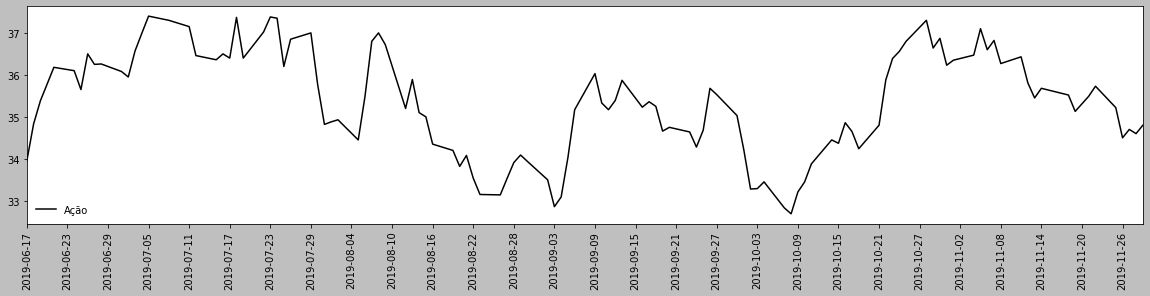

In [237]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(111)

ax.plot(df['Close'], label="Ação")

date_min = df.index.min()
date_max = df.index.max()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_xlim(left=date_min, right=date_max)

ax.legend(loc='lower left', frameon=False)
plt.xticks(rotation=90)
plt.show();

In [238]:
np.mean(df['Close'])


35.356638020482556

In [239]:
np.std(df['Close'])

1.2411360616908023

In [240]:
np.mean(df['Volume'])

20159623.275862068

In [241]:
np.std(df['Volume'])

7084342.191281075

In [242]:
plt.style.use('grayscale')
#eixo das abscissas para a função pertinencia
preco=ctl.Antecedent(np.arange(np.mean(df['Close'])-5*np.std(df['Close']),np.mean(df['Close'])+5*np.std(df['Close']),1), 'preco')
vol=ctl.Antecedent(np.arange(np.mean(df['Volume'])-5*np.std(df['Volume']),np.mean(df['Volume'])+5*np.std(df['Volume']),1e5), 'volume')
dec=ctl.Consequent(np.arange(np.mean(df['Volume'])-5*np.std(df['Volume']),np.mean(df['Volume'])+5*np.std(df['Volume']),1e5), 'decisao')

Text(37.21834211301876, 0.8, 'caro')

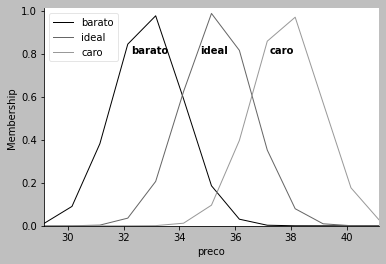

In [243]:
# função de pertinencia para preços
preco['barato']=fuzz.gaussmf(preco.universe,np.mean(df['Close'])-2*np.std(df['Close']),np.std(df['Close']))
preco['ideal']=fuzz.gaussmf(preco.universe,np.mean(df['Close']),np.std(df['Close']))
preco['caro']=fuzz.gaussmf(preco.universe,np.mean(df['Close'])+2*np.std(df['Close']),np.std(df['Close']))
preco.view()
plt.text(x=np.mean(df['Close'])-2.5*np.std(df['Close']),y=0.8,s='barato',fontsize=10,weight='bold')
plt.text(x=np.mean(df['Close'])-0.5*np.std(df['Close']),y=0.8,s='ideal',fontsize=10,weight='bold')
plt.text(x=np.mean(df['Close'])+1.5*np.std(df['Close']),y=0.8,s='caro',fontsize=10,weight='bold')

Text(23701794.371502604, 0.8, 'alto')

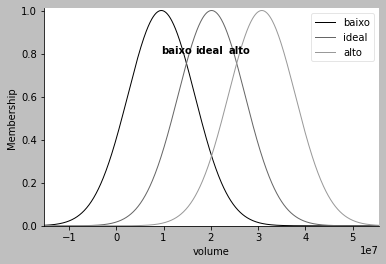

In [244]:
# função de pertinencia para volumes
vol['baixo']=fuzz.gaussmf(vol.universe,np.mean(df['Volume'])-1.5*np.std(df['Volume']),np.std(df['Volume']))
vol['ideal']=fuzz.gaussmf(vol.universe,np.mean(df['Volume']),np.std(df['Volume']))
vol['alto']=fuzz.gaussmf(vol.universe,np.mean(df['Volume'])+1.5*np.std(df['Volume']),np.std(df['Volume']))
vol.view()
plt.text(x=np.mean(df['Volume'])-1.5*np.std(df['Volume']),y=0.8,s='baixo',fontsize=10,weight='bold')
plt.text(x=np.mean(df['Volume'])-0.5*np.std(df['Volume']),y=0.8,s='ideal',fontsize=10,weight='bold')
plt.text(x=np.mean(df['Volume'])+0.5*np.std(df['Volume']),y=0.8,s='alto',fontsize=10,weight='bold')

Text(30786136.56278368, 0.8, 'vender')

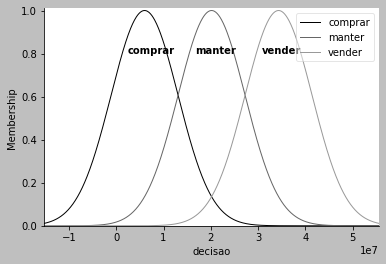

In [245]:
# função de pertinencia para a decisão final
dec['comprar']=fuzz.gaussmf(dec.universe,np.mean(df['Volume'])-2*np.std(df['Volume']),np.std(df['Volume']))
dec['manter']=fuzz.gaussmf(dec.universe,np.mean(df['Volume']),np.std(df['Volume']))
dec['vender']=fuzz.gaussmf(dec.universe,np.mean(df['Volume'])+2*np.std(df['Volume']),np.std(df['Volume']))
dec.view()
plt.text(x=np.mean(df['Volume'])-2.5*np.std(df['Volume']),y=0.8,s='comprar',fontsize=10,weight='bold')
plt.text(x=np.mean(df['Volume'])-0.5*np.std(df['Volume']),y=0.8,s='manter',fontsize=10,weight='bold')
plt.text(x=np.mean(df['Volume'])+1.5*np.std(df['Volume']),y=0.8,s='vender',fontsize=10,weight='bold')

In [246]:
#Regra da Lógica Fuzzy
regra1=ctl.Rule(preco['barato'] & vol['baixo'], dec['comprar'])
regra2=ctl.Rule(preco['barato'] & vol['ideal'], dec['comprar'])
regra3=ctl.Rule(preco['barato'] & vol['alto'], dec['comprar'])
regra4=ctl.Rule(preco['ideal'] & vol['baixo'], dec['comprar'])
regra5=ctl.Rule(preco['ideal'] & vol['ideal'], dec['manter'])
regra6=ctl.Rule(preco['ideal'] & vol['alto'], dec['vender'])
regra7=ctl.Rule(preco['caro'] & vol['baixo'], dec['vender'])
regra8=ctl.Rule(preco['caro'] & vol['ideal'], dec['vender'])
regra9=ctl.Rule(preco['caro'] & vol['alto'], dec['vender'])

In [247]:
#Sistema de criação de controle/simulação
decisao_ctl=ctl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8,regra9])
decisao=ctl.ControlSystemSimulation(decisao_ctl)

In [248]:
#função de calculo para a defuzzificação
def IndFzy(entrada):
    #entrada
    decisao.input['preco']=entrada[0]
    decisao.input['volume']=entrada[1]
    #saída fuzzy
    decisao.compute()
    return(decisao.output['decisao'])

In [249]:
#Valor fuzzzy computado

In [250]:
a = IndFzy([25, 67021300])

In [251]:
a

8737212.182719989

In [252]:
df['Volume'].values[2]

23278900.0

In [253]:
df['Close'].values[2]

35.380001068115234

In [254]:
#decisão final
# inicio=dt.datetime(2021,1,1)
# fim=dt.datetime(2021,5,1)
# df=web.DataReader('PETR4.SA', 'yahoo', inicio, fim)
mval=np.zeros((len(df),3))

for i in range(len(df)):
    res1=IndFzy([df['Close'].values[i], df['Volume'].values[i]])
    j=0
    for t in dec.terms:
        s = np.interp(res1, dec.universe, dec[t].mf)
        mval[i,j]=s
        j=j+1

++++++++++++++++++ decisao final +++++++++++++++++++
0      manter
1      manter
2      manter
3      manter
4      manter
        ...  
111    manter
112    manter
113    manter
114    manter
115    manter
Length: 116, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++


Text(0, 0.5, 'VOLUME')

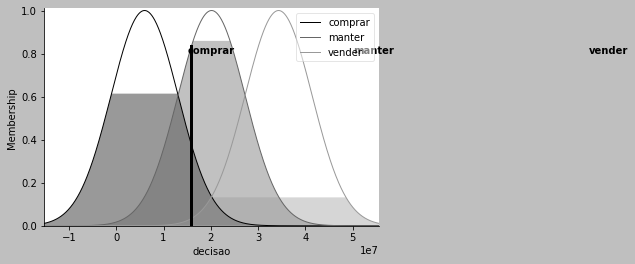

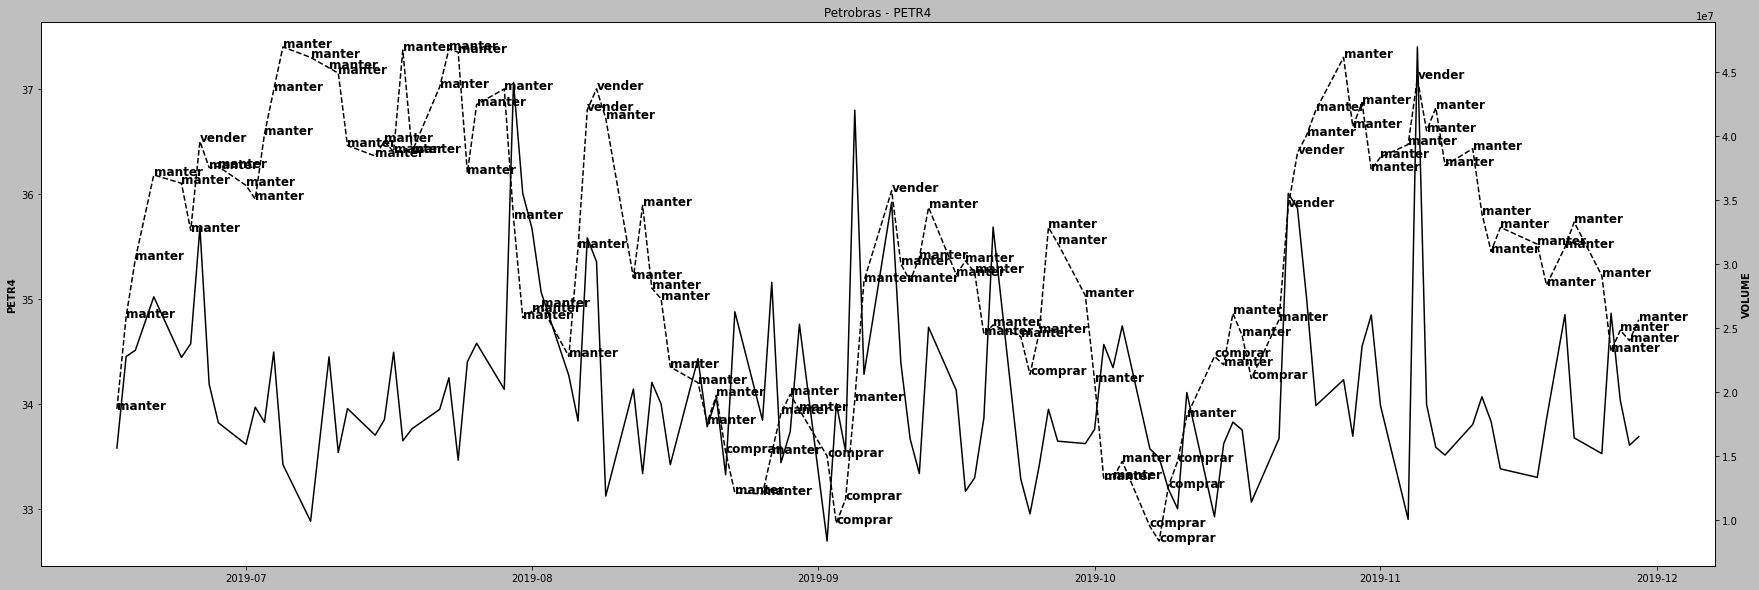

In [255]:
mval=pd.DataFrame(mval, columns=['comprar','manter','vender'])
dec_fuzzy=mval.idxmax(axis=1)
print('++++++++++++++++++ decisao final +++++++++++++++++++')
print(dec_fuzzy)
print('++++++++++++++++++++++++++++++++++++++++++++++++++++')
dec.view(sim=decisao)
plt.text(x=0.15e8,y=0.8,s='comprar',fontsize=10,weight='bold')
plt.text(x=0.5e8,y=0.8,s='manter',fontsize=10,weight='bold')
plt.text(x=1e8,y=0.8,s='vender',fontsize=10,weight='bold')


figure=plt.figure()
figure.set_size_inches(30, 10)
ax1=plt.subplot(111)
plt.title('Petrobras - PETR4')

ax1.plot(df.index, df['Close'], '--k')
ax1.set_ylabel('PETR4', fontsize=10, weight='bold')
for i in range(len(dec_fuzzy)):
    ax1.text(x=df.index[i], y=df['Close'].values[i], s=str(dec_fuzzy[i]), fontsize=12, color='black', weight='bold')

ax2=ax1.twinx()
ax2.plot(df.index,df['Volume'],color='black')
ax2.set_ylabel('VOLUME', fontsize=10, weight='bold')